In this project, we will explore the exciting field of algorithmic trading using the Python programming language. Algorithmic trading involves using computer algorithms to make decisions about buying and selling assets in financial markets. By automating these decisions, traders can take advantage of opportunities in the market more quickly and efficiently than traditional manual trading methods.

We will start with importing required packages: 
We need to use pip3 install for pandas, plotly, yfinance, matplotlib, seaborn and statsmodels

In [1]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import yfinance as yf
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from statsmodels.regression.rolling import RollingOLS
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text

In [2]:
#Get the stock data from Yahoo Finance
stock = yf.Ticker("TSLA")
stock_data = stock.history(period="1y")
print(stock_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2022-03-22 00:00:00-04:00  310.000000  332.619995  307.250000  331.326660   
2022-03-23 00:00:00-04:00  326.646667  346.899994  325.466675  333.036682   
2022-03-24 00:00:00-04:00  336.576660  341.496674  329.600006  337.973328   
2022-03-25 00:00:00-04:00  336.000000  340.600006  332.440002  336.880005   
2022-03-28 00:00:00-04:00  355.033325  365.959991  351.200012  363.946655   

                              Volume  Dividends  Stock Splits  
Date                                                           
2022-03-22 00:00:00-04:00  105868500        0.0           0.0  
2022-03-23 00:00:00-04:00  120676200        0.0           0.0  
2022-03-24 00:00:00-04:00   68920800        0.0           0.0  
2022-03-25 00:00:00-04:00   62031600        0.0           0.0  
2022-03-28 00:00:00-04:00  102506100        0.0           0.0  


The Momentum Trading strategy involves buying assets that have exhibited strong price momentum in the recent past and selling assets that have exhibited weak price momentum. In our implementation, we will use the percent change in Closing price as our momentum indicator, and test its effectiveness in identifying profitable trading opportunities in the financial markets.

In [3]:
stock_data['Momentum'] = stock_data['Close'].pct_change().fillna(0)

stock_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Momentum
Date,,,,,,,,
2022-03-22 00:00:00-04:00,310.000000,332.619995,307.250000,331.326660,105868500,0.0,0.0,0.000000
2022-03-23 00:00:00-04:00,326.646667,346.899994,325.466675,333.036682,120676200,0.0,0.0,0.005161
2022-03-24 00:00:00-04:00,336.576660,341.496674,329.600006,337.973328,68920800,0.0,0.0,0.014823
2022-03-25 00:00:00-04:00,336.000000,340.600006,332.440002,336.880005,62031600,0.0,0.0,-0.003235
2022-03-28 00:00:00-04:00,355.033325,365.959991,351.200012,363.946655,102506100,0.0,0.0,0.080345


To visually analyze the performance of our Momentum Trading strategy, we will create plots that show the changes in Closing price and Momentum over time. These plots will allow us to visualize the trends and patterns in the data, and help us identify the points where our strategy would have made buying or selling decisions.

In [4]:
subplot = make_subplots(rows = 2, cols = 1)
subplot.add_trace(go.Scatter(x=stock_data.index,
                             y = stock_data['Close'],
                             name = 'Closing Price'))
subplot.add_trace(go.Scatter(x= stock_data.index,
                             y = stock_data['Momentum'],
                             name = 'Momentum',
                             yaxis = 'y2'))
subplot.update_layout(title='Algorithmic Trading with Momentum Strategy',
                  xaxis_title='Date',
                  yaxis_title='Price')
subplot.show()

Adding Buy markers when Momentum is >0:

In [5]:
subplot.add_trace(go.Scatter(x= stock_data.loc[stock_data['Momentum'] > 0].index,
                             y = stock_data.loc[stock_data['Momentum']>0 ]['Close'],
                             mode = 'markers',
                             name = 'buy',
                             marker= dict(color = 'green', symbol = 'triangle-up') ))

subplot.show()

Adding Sell markers for Momentum <0:

In [6]:
subplot.add_trace(go.Scatter(x= stock_data.loc[stock_data['Momentum'] < 0].index,
                             y = stock_data.loc[stock_data['Momentum']<0 ]['Close'],
                             mode = 'markers',
                             name = 'sell',
                             marker= dict(color = 'red', symbol = 'triangle-down') ))

subplot.show()

Above information is an illustration of how the Momentum Trading strategy can be employed in Algorithmic Trading. The buy and sell signals are indicated on the graph with green triangle-up and red triangle-down markers, respectively.

Next, we will encapsulate the formulas into a function to increase its flexibility. Users will be able to input the desired ticker symbol and time period, and the function will generate the corresponding subplots.

In [7]:
def stock_function(ticker, time_period):
    stock = yf.Ticker(ticker)
    stock_data = stock.history(period=time_period)
    if stock_data.empty:
        return None
    stock_data['Momentum'] = stock_data['Close'].pct_change().fillna(0)
    print(stock_data.head())
    subplot = make_subplots(rows = 2, cols = 1)
    subplot.add_trace(go.Scatter(x=stock_data.index,
                             y = stock_data['Close'],
                             name = 'Closing Price'))
    subplot.add_trace(go.Scatter(x= stock_data.index,
                             y = stock_data['Momentum'],
                             name = 'Momentum',
                             yaxis = 'y2'))
    subplot.update_layout(title=('Algorithmic Trading with Momentum Strategy for '+ ticker),
                             xaxis_title='Date',
                             yaxis_title='Price')
    subplot.add_trace(go.Scatter(x= stock_data.loc[stock_data['Momentum'] < 0].index,
                             y = stock_data.loc[stock_data['Momentum']<0 ]['Close'],
                             mode = 'markers',
                             name = 'sell',
                             marker= dict(color = 'red', symbol = 'triangle-down') ))
    subplot.add_trace(go.Scatter(x= stock_data.loc[stock_data['Momentum'] > 0].index,
                             y = stock_data.loc[stock_data['Momentum']>0 ]['Close'],
                             mode = 'markers',
                             name = 'buy',
                             marker= dict(color = 'green', symbol = 'triangle-up') ))
    subplot.show()
    
stock_function('AAPL', '1Y')    


                                 Open        High         Low       Close  \
Date                                                                        
2022-03-22 00:00:00-04:00  164.513415  168.399875  163.917037  167.803497   
2022-03-23 00:00:00-04:00  166.978501  171.600496  166.640536  169.185135   
2022-03-24 00:00:00-04:00  170.030010  173.091467  169.185138  173.021896   
2022-03-25 00:00:00-04:00  172.833045  174.224610  171.709844  173.667984   
2022-03-28 00:00:00-04:00  171.133339  174.671901  170.964364  174.542694   

                             Volume  Dividends  Stock Splits  Momentum  
Date                                                                    
2022-03-22 00:00:00-04:00  81532000        0.0           0.0  0.000000  
2022-03-23 00:00:00-04:00  98062700        0.0           0.0  0.008234  
2022-03-24 00:00:00-04:00  90131400        0.0           0.0  0.022678  
2022-03-25 00:00:00-04:00  80546200        0.0           0.0  0.003734  
2022-03-28 00:00:00-04

In order to narrow down the stocks to input into our previously created function for testing the Momentum Trading strategy, we need to identify the stocks with significant price fluctuations. The large size of stock exchange datasets makes it difficult to load into Python, so we will use SQL (specifically MySQL) to work with the database. 

In this project, we will be analyzing a dataset of stocks traded on the New York Stock Exchange from 2010 to 2016. We will connect our Jupyter Notebook to MySQL, check the number of rows in the dataset, and showcase the data in the MySQL table. Using LAG and Partition functions, we will retrieve a list of the top 5 stocks with the highest average price fluctuations during the data period. It's important to note that in real-life scenarios, a more recent sample should be used for valid comparison.

In [8]:
engine = create_engine('mysql+mysqlconnector://root:@127.0.0.1/Trading', echo = False)
conn = engine.connect()

query = text('SELECT * FROM prices')
dataframe = pd.read_sql_query(query, conn)
dataframe

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


We have established a connection to our MySQL database schema called "Trading" using the SQLAlchemy module and displayed the contents of the Prices table.
This table contains a massive 851,264 rows of data!

Note that a new version of SQLAlchemy, 2.0.0, has removed the engine.execute command. As a workaround, we have added a "text" function.

Next, we will execute a query to add a new column called "Prev_Close" to the table. This column will be used later to calculate the percentage change between closing prices.

In [9]:
query = text('SELECT *, \
            COALESCE(LAG(Close) OVER (Partition by Symbol Order By date),0) as PrevClose \
            from prices \
            limit 10')
dataframe = pd.read_sql_query(query, conn)
dataframe

,date,symbol,open,close,low,high,volume,PrevClose
0,2010-01-04,A,22.453504,22.389128,22.267525,22.625180,3815500.0,0.000000
1,2010-01-05,A,22.324749,22.145923,22.002861,22.331903,4186000.0,22.389128
2,2010-01-06,A,22.067240,22.067240,22.002861,22.174536,3243700.0,22.145923
3,2010-01-07,A,22.017168,22.038626,21.816881,22.045780,3095100.0,22.067240
4,2010-01-08,A,21.917024,22.031474,21.745350,22.067240,3733900.0,22.038626
5,2010-01-11,A,22.088697,22.045780,21.938484,22.210300,4781500.0,22.031474
6,2010-01-12,A,21.859800,21.781117,21.616594,21.924177,2871000.0,22.045780
7,2010-01-13,A,21.795421,21.952789,21.494994,22.017168,3418900.0,21.781117
8,2010-01-14,A,21.881258,22.281832,21.816881,22.346209,6163700.0,21.952789
9,2010-01-15,A,22.331903,21.766810,21.695278,22.432045,4626600.0,22.281832


With the addition of the PrevClose column and filling the NaN values with 0 using COALESCE function, we can proceed to calculate the percentage change. This will allow us to generate a list of the top 5 stocks with the highest percentage change on NYSE during 2010-2016.

In [10]:
query = text('SELECT symbol, \
              ROUND(AVG(((Close - PrevClose)/PrevClose)*100),2) AS Perc_change \
              FROM \
              (SELECT symbol, close, \
               LAG(Close) OVER (PARTITION BY symbol ORDER BY date) AS PrevClose \
               FROM prices) AS x \
              GROUP BY symbol\
              order by Perc_change desc\
              limit 5')

dataframe = pd.read_sql_query(query, conn)
dataframe

,symbol,Perc_change
0,EVHC,0.25
1,NFLX,0.22
2,REGN,0.19
3,URI,0.18
4,ULTA,0.18


Having obtained potential stocks to be tested, we will feed them into our stock_function. However, it appears that EVHC data is currently not available on Yahoo Finance for unknown reasons. We have made changes to the stock_function to prevent empty graphs from being printed if there is no pricing data returned.

There could be several reasons why you are not able to retrieve price data for Envision Healthcare Corporation (EVHC) from Yahoo Finance. Here are a few possibilities:

1) The company may have been delisted from the stock exchange or merged with another company, in which case its stock may no longer be available for trading.

2) There could be a technical issue with Yahoo Finance's data feed or with the way you are trying to retrieve the data. You may want to try again at a later time or use a different data provider.

3) It's possible that the company has changed its ticker symbol or name. Make sure you are using the correct symbol or name when searching for the stock.

4) Another possibility is that there simply may not be any price data available for the time period you are looking for.

In the case of Envision Healthcare, the company still exists, but its data is not available on Yahoo Finance at the time of this project. This highlights the importance of verifying information from multiple sources before making any investment decisions. Additionally, using the latest data can help ensure that any changes in a company's name, ticker symbol, or other relevant information are taken into account.

In [11]:
for symbol in dataframe['symbol']:
    stock_function(symbol, '1Y')

EVHC: No data found for this date range, symbol may be delisted
                                 Open        High         Low       Close  \
Date                                                                        
2022-03-22 00:00:00-04:00  371.140015  386.660004  366.760010  382.920013   
2022-03-23 00:00:00-04:00  379.769989  382.459991  374.489990  374.489990   
2022-03-24 00:00:00-04:00  379.760010  379.760010  368.899994  375.709991   
2022-03-25 00:00:00-04:00  377.070007  377.640015  366.429993  373.850006   
2022-03-28 00:00:00-04:00  375.230011  380.279999  366.730011  378.510010   

                            Volume  Dividends  Stock Splits  Momentum  
Date                                                                   
2022-03-22 00:00:00-04:00  4242800        0.0           0.0  0.000000  
2022-03-23 00:00:00-04:00  3729000        0.0           0.0 -0.022015  
2022-03-24 00:00:00-04:00  3888500        0.0           0.0  0.003258  
2022-03-25 00:00:00-04:00  3574500  

                                 Open        High         Low       Close  \
Date                                                                        
2022-03-22 00:00:00-04:00  695.049988  695.049988  683.679993  692.640015   
2022-03-23 00:00:00-04:00  693.039978  693.039978  667.880005  669.219971   
2022-03-24 00:00:00-04:00  667.309998  680.080017  666.349976  679.760010   
2022-03-25 00:00:00-04:00  679.900024  685.010010  676.140015  680.030029   
2022-03-28 00:00:00-04:00  676.289978  694.229980  676.289978  693.400024   

                           Volume  Dividends  Stock Splits  Momentum  
Date                                                                  
2022-03-22 00:00:00-04:00  576900        0.0           0.0  0.000000  
2022-03-23 00:00:00-04:00  608500        0.0           0.0 -0.033813  
2022-03-24 00:00:00-04:00  402500        0.0           0.0  0.015750  
2022-03-25 00:00:00-04:00  366800        0.0           0.0  0.000397  
2022-03-28 00:00:00-04:00  625600 

                                 Open        High         Low       Close  \
Date                                                                        
2022-03-22 00:00:00-04:00  348.858931  356.912575  348.410386  355.198181   
2022-03-23 00:00:00-04:00  353.842624  359.992522  350.862382  353.274475   
2022-03-24 00:00:00-04:00  355.088551  358.407681  350.922186  357.809662   
2022-03-25 00:00:00-04:00  358.836304  363.311656  357.660128  362.484375   
2022-03-28 00:00:00-04:00  361.258379  362.364745  355.258016  362.215240   

                           Volume  Dividends  Stock Splits  Momentum  
Date                                                                  
2022-03-22 00:00:00-04:00  703500        0.0           0.0  0.000000  
2022-03-23 00:00:00-04:00  795800        0.0           0.0 -0.005416  
2022-03-24 00:00:00-04:00  559600        0.0           0.0  0.012838  
2022-03-25 00:00:00-04:00  599200        0.0           0.0  0.013065  
2022-03-28 00:00:00-04:00  397900 

                                 Open        High         Low       Close  \
Date                                                                        
2022-03-22 00:00:00-04:00  391.089996  398.589996  385.850006  389.750000   
2022-03-23 00:00:00-04:00  388.000000  390.899994  383.440002  389.790009   
2022-03-24 00:00:00-04:00  389.959991  396.619995  387.420013  395.839996   
2022-03-25 00:00:00-04:00  398.299988  398.559998  391.769989  395.070007   
2022-03-28 00:00:00-04:00  394.519989  396.109985  389.579987  395.480011   

                           Volume  Dividends  Stock Splits  Momentum  
Date                                                                  
2022-03-22 00:00:00-04:00  650900        0.0           0.0  0.000000  
2022-03-23 00:00:00-04:00  652000        0.0           0.0  0.000103  
2022-03-24 00:00:00-04:00  565200        0.0           0.0  0.015521  
2022-03-25 00:00:00-04:00  447800        0.0           0.0 -0.001945  
2022-03-28 00:00:00-04:00  416400 

In the second part of this project, I will be exploring Pairs Trading:This project will involve investigating Pairs Trading in the second part.
Pairs Trading is a popular trading strategy that involves buying and selling two highly correlated financial instruments simultaneously in order to profit from temporary divergences in their prices.

In [12]:
symbol_list = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']
data = yf.download( symbol_list, start='2022-01-01', end='2023-01-01')['Adj Close']



[*********************100%***********************]  5 of 5 completed


In [13]:
#finding co-integrated pairs:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs
scores, pvalues, pairs = find_cointegrated_pairs(data)

The function mentioned above uses a collection of securities to examine the presence of cointegration among all possible pairs. Cointegration is a statistical measure that determines whether two variables are related to each other, and if so, by how much. The function generates a matrix that indicates the cointegration test score and another matrix that represents p-values. Additionally, it produces a list of pairs where the p-value is less than 0.05, indicating a high level of confidence in the existence of cointegration between those pairs.

<Axes: >

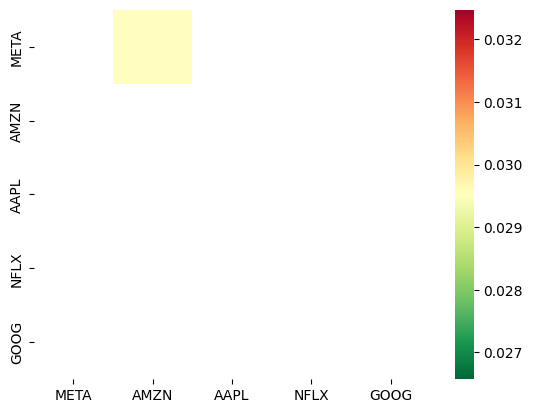

In [14]:
#Now let's plot the results:

sns.heatmap(
    pvalues, 
    xticklabels=symbol_list, 
    yticklabels=symbol_list, 
    cmap='RdYlGn_r', 
    mask = (pvalues >= 0.05)
)

It looks like Meta and Amazon are co-integrated.
Once we have identified a pair, we can perform a linear regression using statsmodels to model the spread between META and AMZN as a linear combination. The beta coefficient, also called the hedge ratio, is represented by the variable b in the regression model.

In [15]:
S1 = data['AMZN']
S2 = data['META']

S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['AMZN']
b = results.params['AMZN']
spread = S2 - b * S1

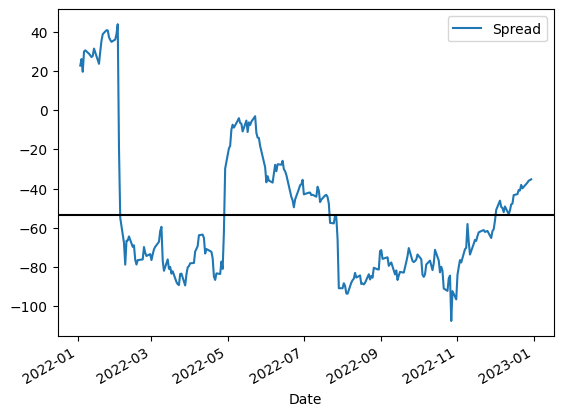

In [16]:
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread'])

To execute the trade strategy, you can buy the spread when it reaches a "too low" level and sell the spread when it hits a "too high" level. However, it's important to define what constitutes "too low" and "too high". One way to do this is by normalizing the spread using the z-score and using this as the trading signal.

If you decide to buy the pair, you would purchase META and simultaneously sell b shares of AMZN. Conversely, if you choose to sell the pair, you would sell META and buy b shares of AMZN.

In [17]:
def z_score(series):
    return (series - series.mean())/ np.std(series) 
z_score(spread)

Date
2022-01-03    2.162577
2022-01-04    2.257037
2022-01-05    2.072832
2022-01-06    2.365880
2022-01-07    2.383661
                ...   
2022-12-23    0.383990
2022-12-27    0.467218
2022-12-28    0.495592
2022-12-29    0.503169
2022-12-30    0.514895
Length: 251, dtype: float64

The z-score is a statistical measure that represents the number of standard deviations away from the mean that a particular value falls. It is often used to standardize data and identify extreme values.

The equity curve, in finance, represents the growth in the value of an investment over time. It is calculated by plotting the cumulative returns of the investment over a specified period.

In the provided code, a function is created to plot the z-score, which is used to determine the trading signal for the pair. The equity curve of buying and selling the pair is estimated by creating a DataFrame with the trading signal and position size, adding a column to the DataFrame indicating long or short positions based on the signal level, and then plotting the cumulative returns of the resulting positions.

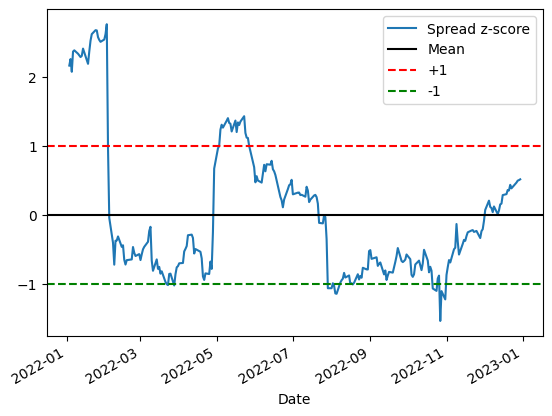

In [18]:
z_score(spread).plot()
plt.axhline(z_score(spread).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1'])

<Axes: xlabel='Date'>

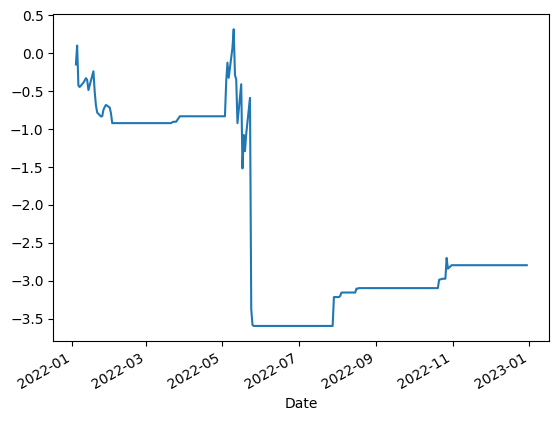

In [19]:
# Displaying signal and position size in the pair
trades = pd.concat([z_score(spread), S2 - b * S1], axis=1)
trades.columns = ["signal", "position"]

# Adding a long and short position at the z-score levels
trades["side"] = 0.0
trades.loc[trades.signal <= -1, "side"] = 1
trades.loc[trades.signal >= 1, "side"] = -1

#Plotting the equity curve

returns = trades.position.pct_change() * trades.side
returns.cumsum().plot()

The equity line for the Meta and Amazon pairs trading initially went down and then up, which suggests that our strategy may have been profitable during that period.

The significant drop in the equity line in July 2022, which was caused by tech sector fluctuations, indicates that our strategy would have suffered a loss during that period.

The fact that the equity line has been going up slightly since then suggests that our strategy may have recovered somewhat from the losses incurred during the tech crush.

However, it's important to note that the slight increase in the equity line does not necessarily indicate that the strategy is currently profitable or that it will continue to be profitable in the future. It's important to conduct a thorough analysis of the trading strategy, taking into account all relevant factors, such as market conditions, risk management, and historical performance, to determine its overall effectiveness.


We will now develop a function called "pairs_trading" which will generate plots for cointegration. The function will accept a list of stock tickers provided by the user and will determine if there are any cointegrated stocks. The user can then use the identified stocks in the "equity_line" function to test the trading strategy:

[*********************100%***********************]  5 of 5 completed


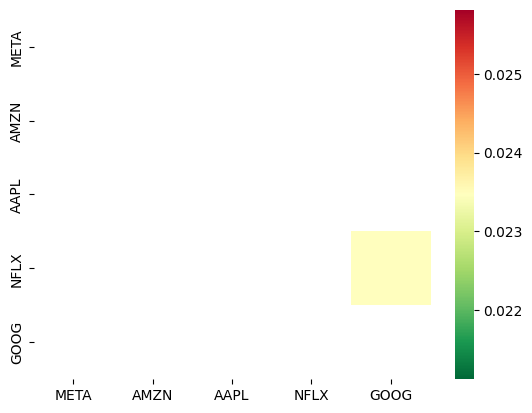

In [20]:
#Creating a function for Cointegration plotting:
# format for start and end is YYYY-MM-DD
def pairs_trading(list, start_date, end_date):
    data = yf.download( list, start=start_date, end=end_date)['Adj Close']
    scores, pvalues, pairs = find_cointegrated_pairs(data)
    sns.heatmap(
    pvalues, 
    xticklabels=symbol_list, 
    yticklabels=symbol_list, 
    cmap='RdYlGn_r', 
    mask = (pvalues >= 0.05))

pairs_trading(['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG'], '2017-01-01', '2018-01-01')   

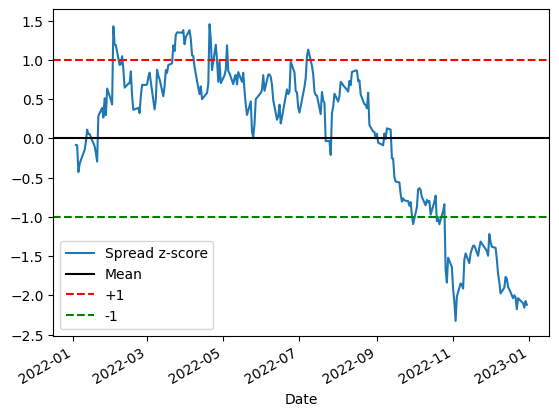

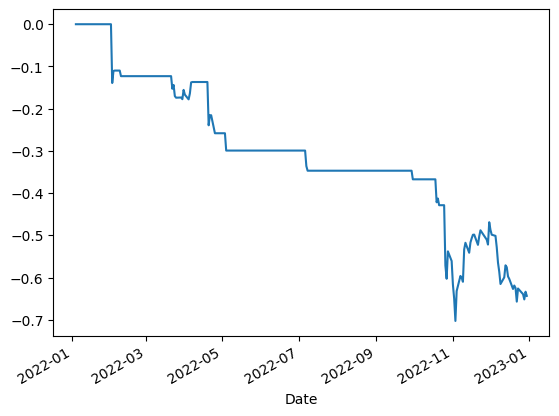

In [21]:
#input Pairs' tickers into a visualization function to calculate z-score and equity line:
def equity_line(one, two):
    S1 = data[one]
    S2 = data[two]
    S1 = sm.add_constant(S1)
    results = sm.OLS(S2, S1).fit()
    S1 = S1[one]
    b = results.params[one]
    spread = S2 - b * S1
    z_score(spread)
    z_score(spread).plot()
    plt.axhline(z_score(spread).mean(), color='black')
    plt.axhline(1.0, color='red', linestyle='--')
    plt.axhline(-1.0, color='green', linestyle='--')
    plt.legend(['Spread z-score', 'Mean', '+1', '-1'])
    plt.show()
    plt.close()
    trades = pd.concat([z_score(spread), S2 - b * S1], axis=1)
    trades.columns = ["signal", "position"]
    trades["side"] = 0.0
    trades.loc[trades.signal <= -1, "side"] = 1
    trades.loc[trades.signal >= 1, "side"] = -1
    returns = trades.position.pct_change() * trades.side
    returns.cumsum().plot()

equity_line('NFLX', 'GOOG')
    

In conclusion, this project demonstrated the use of Python and various libraries, such as pandas, numpy, and matplotlib, to explore financial data and develop investment strategies. The first part of the project focused on analyzing stock prices to identify high-performing stocks and develop a trading strategy. The second part introduced pairs trading and the concept of cointegration to identify pairs of stocks that may be suitable for pairs trading. Overall, this project highlights the importance of data analysis and research in making informed investment decisions.